# HM01 - Pump failure data

# _Josep Fortiana_ $\mskip100mu$  2022-05-23

***
###### LaTeX macros
$\def\argmax{\operatorname{arg\,max}}$
$\def\argmin{\operatorname{arg\,min}}$
$\def\binomdist{\operatorname{Binomial}}$
$\def\berndist{\operatorname{Bernoulli}}$
$\def\betabinomdist{\operatorname{Beta-Binomial}}$
$\def\betadist{\operatorname{Beta}}$
$\def\betahat{\kern1.3pt\hat{\kern-1.3pt \beta}}$
$\def\borel{\operatorname{Borel}}$
$\def\cauchydist{\operatorname{Cauchy}}$
$\def\CondTo{\mathbin{|\mskip0.5mu}}$
$\def\cov{\operatorname{cov}}$
$\def\cor{\operatorname{cor}}$
$\def\dexpdist{\operatorname{DExp}}$
$\def\eqdef{\stackrel{\text{def}}{\mskip3mu=\mskip3mu}}$
$\def\cE{\cal E}$
$\def\Ee{\operatorname{E}}$
$\def\expdist{\operatorname{Exponential}}$
$\def\fdist{\operatorname{F}}$
$\def\gammadist{\operatorname{Gamma}}$
$\def\geomdist{\operatorname{Geom}}$
$\def\halfcauchydist{\operatorname{Cauchy}^{+}}$
$\def\hyperdist{\operatorname{Hypergeom}}$
$\def\hypergeomdist{\operatorname{Hypergeom}}$
$\def\indep{\perp{\mskip-16mu}\perp}$
$\DeclareMathOperator{\indica}{\mathbb{1}}$
$\DeclareMathOperator{\invgammadist}{InvGamma}$
$\def\laplacedist{\operatorname{Laplace}}$
$\def\lognormaldist{\operatorname{Log-Normal}}$
$\DeclareMathOperator{\multinomialdist}{Multinomial}$
$\DeclareMathOperator{\multinomdist}{Multinomial}$
$\def\N{\mathbb{N}}$
$\def\negbindist{\operatorname{NegativeBinomial}}$
$\def\normaldist{\operatorname{Normal}}$
$\def\cP{\cal P}$
$\def\poissondist{\operatorname{Poisson}}$
$\def\prob{P}$
$\def\R{\mathbb{R}}$ 
$\def\stilde{\tilde{s}}$ 
$\def\sqtilde{\tilde{s}{}^{2}}$ 
$\def\tdist{\operatorname{t}}$
$\def\unifdist{\operatorname{Unif}}$
$\def\va{\text{v.a.}}$
$\def\var{\operatorname{var}}$
$\def\Var{\operatorname{Var}}$
$\def\xbar{\kern1.3pt\overline{\kern-1.3pt x}}$
$\def\Xbar{\kern1.3pt\overline{\kern-1.3pt X}}$
$\def\yhat{\kern1.3pt\hat{\kern-1.3pt y}}$
$\def\Z{\mathbb{Z}}$
***

In [1]:
#install.packages("bayesplot",dependencies=TRUE,repos="https://cloud.r-project.org")
require(bayesplot,quietly=TRUE)

This is bayesplot version 1.9.0

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting



# The pump failure dataset

Source: Gaver, D. P. & O'Muircheartaigh, I G. (1987). _Robust empirical Bayes analysis of event rates._ Technometrics 29, No. 1, pp. 1-15.

This is a very classical example in Bayesian modelling. It demonstrates hierarchical models and the need thereof.

Robert, Casella (2010), _Introducing Monte Carlo Methods with R,_ Chapter 7, Example 7.12: Gibbs sampling in the Pump failure dataset, pag. 222ff.

Number of failures observed and times of observation of ten pumps in a nuclear plant, with the data given in the following table:
	
$$
\begin{array}{l|cccccccccc}
	\hline
	\text{Pump}    &1		&2		&3		&4		&5		&6		&7		&8		&9		&10\\[0.25cm]
	\hline
	\text{Failures}&5		&1		&5		&14		&3		&19		&1		&1		&4		&22\\[0.25cm]
	\text{Time} &94.320 &15.720  &62.880  &125.760  &5.240  &31.440  &1.048 &1.048  &2.096 &10.480\\[0.25cm]
	\hline
\end{array}
$$



#### Data

In [2]:
x<-c(5, 1, 5, 14, 3, 19, 1, 1, 4, 22)
t<-c(94.320, 15.720, 62.880, 125.760, 5.240, 31.440, 1.048, 1.048, 2.096, 10.480)
n<-length(x)

# Frequentist treatment

Model assumes the number of failures of the $i$-th pump follows a Poisson process with parameter $\lambda_{i}$, $(1\leq i\leq n)$, $n=10$.

For an observation time $t_{i}$, the number of failures $X_{i}$ is thus a r.v.:

$$
    X_{i}\sim\operatorname{Poisson}(\lambda_{i}\cdot t_{i}),\mskip40mu 1\leq i\leq n.
$$



Either each pump has a different $\lambda_{i}$ parameter, $1\leq i\leq n=10$,

In [3]:
# Either each lambda.i is ML-estimated from a single observation as x.i/t.i
Individual.lambda.ML<-x/t
round(Individual.lambda.ML,3)

[1] 0.053 0.064 0.080 0.111 0.573 0.604 0.954 0.954 1.908 2.099

Or all pumps share the same $\lambda$ parameter, estimated as the average $\bar\lambda$ of the $n=10$ $\lambda_{i}$ values, $1\leq i\leq n$.

In [4]:
# or a common lambda is ML-estimated as the average of the above
mean.lambda.ML<-mean(Individual.lambda.ML)
round(mean.lambda.ML,3)

[1] 0.74

# Empirical Bayes

The **empirical Bayes** approach is to consider the $\lambda_{i}$ parameters as samples from a common _prior_ distribution.

This distribution is assumed to be a $\gammadist(\alpha,\beta)$.

These parameters $\alpha$ and $\beta$ are obtained from the observed data (hence the **empirical** name).

Using the conjugate Gamma prior pdf for the Poisson likelihood, we get the model:

$$
    \begin{array}{clll}
        X_{i}      &\sim&\operatorname{Poisson}(\lambda_{i}\cdot t_{i}), &i=1,\dots,n,\\[0.35cm]
        \lambda_{i}&\sim&\operatorname{Gamma}(\alpha,\beta),              &i=1,\dots,n,
    \end{array}
$$

$\alpha$, $\beta$ are derived from the "observed" set of ML $\lambda$ estimates as follows:

A Gamma distribution with parameters $\alpha$ and $\beta$ has expectation and variance:

$$
    \mu=\dfrac{\alpha}{\beta},\mskip50mu \sigma^2=\dfrac{\alpha}{\beta^2}.
$$

Given $\mu$ and $\sigma^2$, we obtain:

$$
    \alpha=\dfrac{\mu^{2}}{\sigma^{2}},\mskip50mu \beta=\dfrac{\mu}{\sigma^{2}},
$$

then $\mu$ is estimated by the empirical mean $\xbar$ and $\sigma^{2}$ by the empirical variance $\sqtilde$.

The **empirical Bayes** procedure is to _"estimate"_ parameters in prior pdf's from data, either by ML or by the method of moments.

In [6]:
# We try the two possible candidates, corrected and uncorrected variance
var.tilde.lambda.ML<-var(Individual.lambda.ML)        # Corrected variance of "observed" lambdas 
writeLines(sprintf("Corrected   variance of the 'observed' lambdas = %4.3f",round(var.tilde.lambda.ML,3)))
var.lambda.ML=(n-1)*var.tilde.lambda.ML/n             # Uncorrected variance of "observed" lambdas 
writeLines(sprintf("Uncorrected variance of the 'observed' lambdas = %4.3f",round(var.lambda.ML,3)))

Corrected   variance of the 'observed' lambdas = 0.568
Uncorrected variance of the 'observed' lambdas = 0.511


Here, we estimate $\alpha$ and $\beta$ in the prior $\operatorname{Gamma}(\alpha,\beta)$ from the empirical mean and variance of the $\lambda$'s.

In [7]:
alpha.tilde.hat<-(mean.lambda.ML)^2/var.tilde.lambda.ML
beta.tilde.hat<-mean.lambda.ML/var.tilde.lambda.ML
alpha.hat<-(mean.lambda.ML)^2/var.lambda.ML
beta.hat<-mean.lambda.ML/var.lambda.ML
c(round(alpha.tilde.hat,3),round(beta.tilde.hat,3))
c(round(alpha.hat,3),round(beta.hat,3))

[1] 0.964 1.303

[1] 1.071 1.448

## Posterior pdf with the empirical Bayes approach

Each $i$-th pump has a posterior pdf for $\lambda_{i}$, given its $t_{i}$ and the observed $x_{i}$.

From the conjugate models formula:

$$
    \lambda_{i}\,|\,x_{i}\sim\operatorname{Gamma}(\widehat{\alpha}+x_{i},\widehat{\beta}+t_{i}).
$$

In [8]:
Empirical.alpha.post<-alpha.hat+x
Empirical.beta.post<-beta.hat+t
rbind(round(Empirical.alpha.post,3),round(Empirical.beta.post,3))

[,1]   [,2]   [,3]   [,4]    [,5]  [,6]   [,7]  [,8]  [,9]  [,10] 
[1,]  6.071  2.071  6.071  15.071 4.071 20.071 2.071 2.071 5.071 23.071
[2,] 95.768 17.168 64.328 127.208 6.688 32.888 2.496 2.496 3.544 11.928

### Posterior expectations

In [9]:
Empirical.lambda.post.mean<-Empirical.alpha.post/Empirical.beta.post
str(Empirical.lambda.post.mean)
round(Empirical.lambda.post.mean,3)

 num [1:10] 0.0634 0.1207 0.0944 0.1185 0.6088 ...


[1] 0.063 0.121 0.094 0.118 0.609 0.610 0.830 0.830 1.431 1.934

### Posterior 90% credible intervals

In [10]:
round(rbind(qgamma(0.05,shape=Empirical.alpha.post,rate=Empirical.beta.post),qgamma(0.95,shape=Empirical.alpha.post,rate=Empirical.beta.post)),3)

[,1]  [,2]  [,3]  [,4]  [,5]  [,6]  [,7]  [,8]  [,9]  [,10]
[1,] 0.028 0.022 0.041 0.073 0.211 0.405 0.154 0.154 0.569 1.323
[2,] 0.111 0.283 0.165 0.173 1.175 0.850 1.947 1.947 2.611 2.641

### Posterior MAP estimates

Using that the mode of a Gamma distribution is $(\alpha-1)/\beta$

In [11]:
Empirical.lambda.post.MAP<-(Empirical.alpha.post-1)/Empirical.beta.post
round(Empirical.lambda.post.MAP,3)

[1] 0.053 0.062 0.079 0.111 0.459 0.580 0.429 0.429 1.149 1.850

## Full Bayesian hierarchical treatment

The modeling is based on the assumption that the number of failures of the $i$-th pump follows a Poisson process with parameter $\lambda_{i}$, $(1\leq i\leq 10)$.

For an observation time $t_{i}$, the number of failures $X_{i}$ is thus a $\poissondist(\lambda_{i}\cdot t_{i})$ random variable.

Each $\lambda_{i}$ is considered as a sample from a common $\gammadist(\alpha,\beta)$.

In turn, $\beta$ is given a _hyperprior_ distribution $\gammadist(\gamma,\delta)$.

$\alpha$, $\gamma$ and $\delta$ take constant values to be decided.  

Robert, Casella (2010) use $\alpha=1.8$, $\gamma=0.1$ and $\delta=1.0$ or $\delta=100.0$.

Thus we have a hierarchical model:

$$
    \begin{array}{clll}
    X_{i} &\sim&\poissondist(\lambda_{i}\cdot t_{i}),   \mskip50mu     &i=1,\dots,10,\\[0.35cm]
    \lambda_{i} &\sim&\gammadist(\alpha,\beta),              &i=1,\dots,10,\\[0.35cm]
    \beta &\sim&\gammadist(\gamma,\delta).
    \end{array}
$$

In the original paper where this data were first analyzed with a full Bayesian model:

Edward I. George, U. E. Makov and A. F. M. Smith (1993), _"Conjugate Likelihood Distributions"_   
Scandinavian Journal of Statistics, Vol. 20, No. 2 (1993), 147-156,

They use, instead, an exponential prior for $\alpha$:

$$
    \begin{array}{cll}
    \alpha &\sim&\operatorname{Exp}(\omega),
    \end{array}
$$

with parameter either $\omega=1.0$ or $\omega=1/100$. instead of a constant value.

**Note:** in the paper _Reader Reaction: A Re-Analysis of the Pump-Failure Data (with Response),_ by
J. A. Nelder, E. I. George, U. E. Makov and A. F. M. Smith,   
Scandinavian Journal of Statistics, Vol. 21, No. 2 (Jun., 1994), pp. 187-191,   
they notice that pumps 1, 3, 4, and 6 were operated continuously,   
whereas the remaining ones were operated intermittently. 

Then they show that an improved fit is obtained when this difference is taken into account.

# Using JAGS 

In [12]:
#install.packages("R2jags", dependencies=TRUE, repos= "https://cloud.r-project.org")
require(R2jags)

Loading required package: R2jags

Loading required package: rjags

Loading required package: coda

Linked to JAGS 4.3.1

Loaded modules: basemod,bugs


Attaching package: 'R2jags'


The following object is masked from 'package:coda':

    traceplot




## Data 

In [13]:
x<-c(5, 1, 5, 14, 3, 19, 1, 1, 4, 22)
t<-c(94.320, 15.720, 62.880, 125.760, 5.240, 31.440, 1.048, 1.048, 2.096, 10.480)
n<-length(x)

In [14]:
pumps.JAGS.01.data<-list(n=n,t=t,x=x)

### Model 1 ($\alpha\sim\expdist(1)$)

In [15]:
pumps.JAGS.01.model<-"model{
    for (i in 1:n) {
        lambda[i] ~ dgamma(alpha, beta)
        theta[i] <- lambda[i] * t[i]
        x[i] ~ dpois(theta[i])
        }
    alpha ~ dexp(1)
    beta ~ dgamma(0.1, 1.0)
    }"

cat(pumps.JAGS.01.model,file="pumps.JAGS.01.jag")

### Inits

In [16]:
pumps.JAGS.01.inits<-list(alpha = 1, beta = 1)

### Run JAGS

In [17]:
pumps.JAGS.01.samples<-jags(data=pumps.JAGS.01.data,n.chains=3,parameters.to.save=c("alpha", "beta","lambda"), 
        model.file="pumps.JAGS.01.jag",n.iter=15000,n.burnin=5000)

module glm loaded



Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 10
   Unobserved stochastic nodes: 12
   Total graph size: 45

Initializing model



In [18]:
pumps.JAGS.01.mcmc<-as.mcmc(pumps.JAGS.01.samples)
summary(pumps.JAGS.01.mcmc)


Iterations = 5001:14991
Thinning interval = 10 
Number of chains = 3 
Sample size per chain = 1000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

               Mean      SD  Naive SE Time-series SE
alpha       0.69459 0.26261 0.0047945      0.0047951
beta        0.91872 0.52439 0.0095740      0.0095758
deviance   42.74013 4.24091 0.0774280      0.0796629
lambda[1]   0.05947 0.02516 0.0004593      0.0004594
lambda[10]  1.99307 0.42661 0.0077887      0.0075504
lambda[2]   0.09888 0.07700 0.0014058      0.0014062
lambda[3]   0.08909 0.03782 0.0006904      0.0006763
lambda[4]   0.11562 0.03022 0.0005517      0.0005793
lambda[5]   0.59659 0.31716 0.0057906      0.0057925
lambda[6]   0.60760 0.13997 0.0025554      0.0025772
lambda[7]   0.89426 0.73907 0.0134935      0.0142011
lambda[8]   0.87914 0.70936 0.0129511      0.0127433
lambda[9]   1.59230 0.76607 0.0139865      0.0142890

2. Quantiles for each variable:

                2.5%     

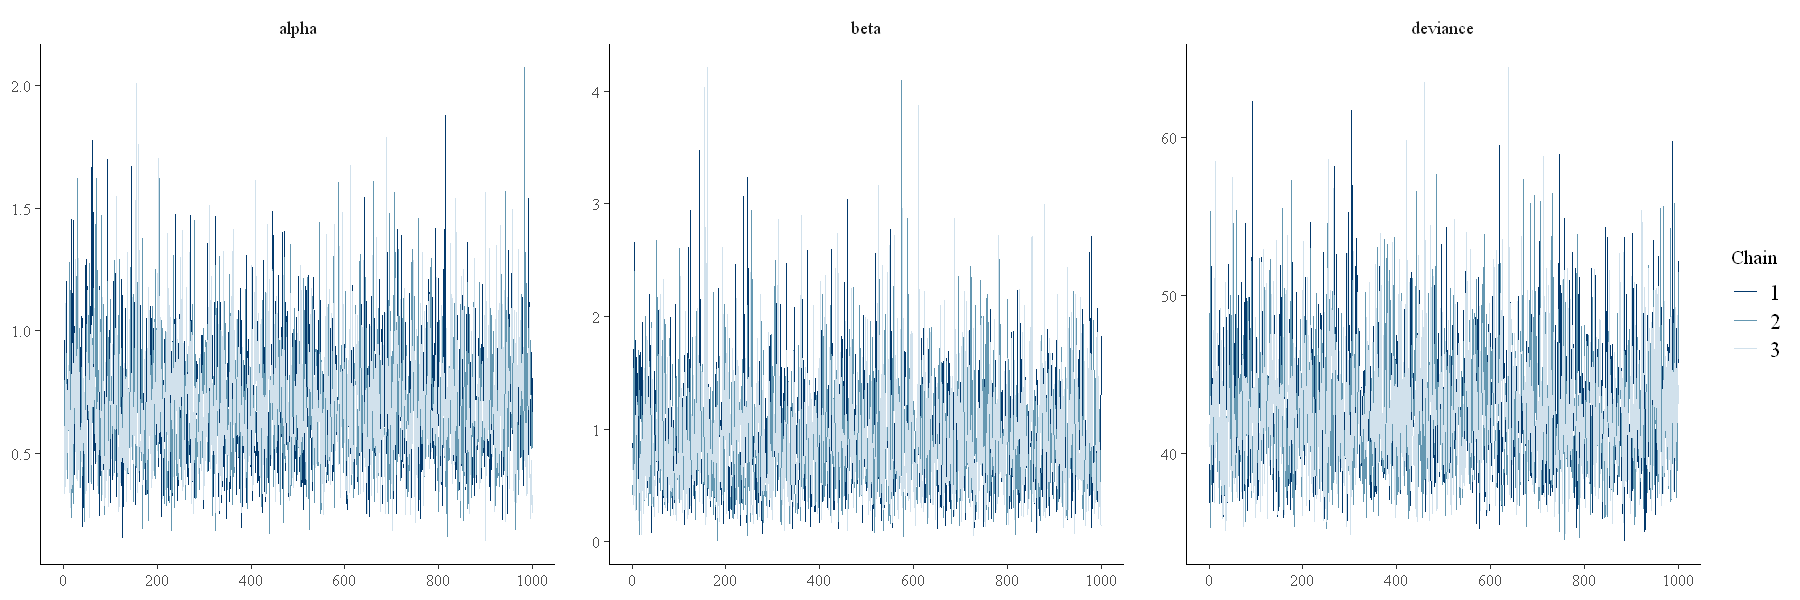

In [19]:
options(repr.plot.width=15,repr.plot.height=5)
mcmc_trace(pumps.JAGS.01.mcmc,pars=c("alpha","beta","deviance"))

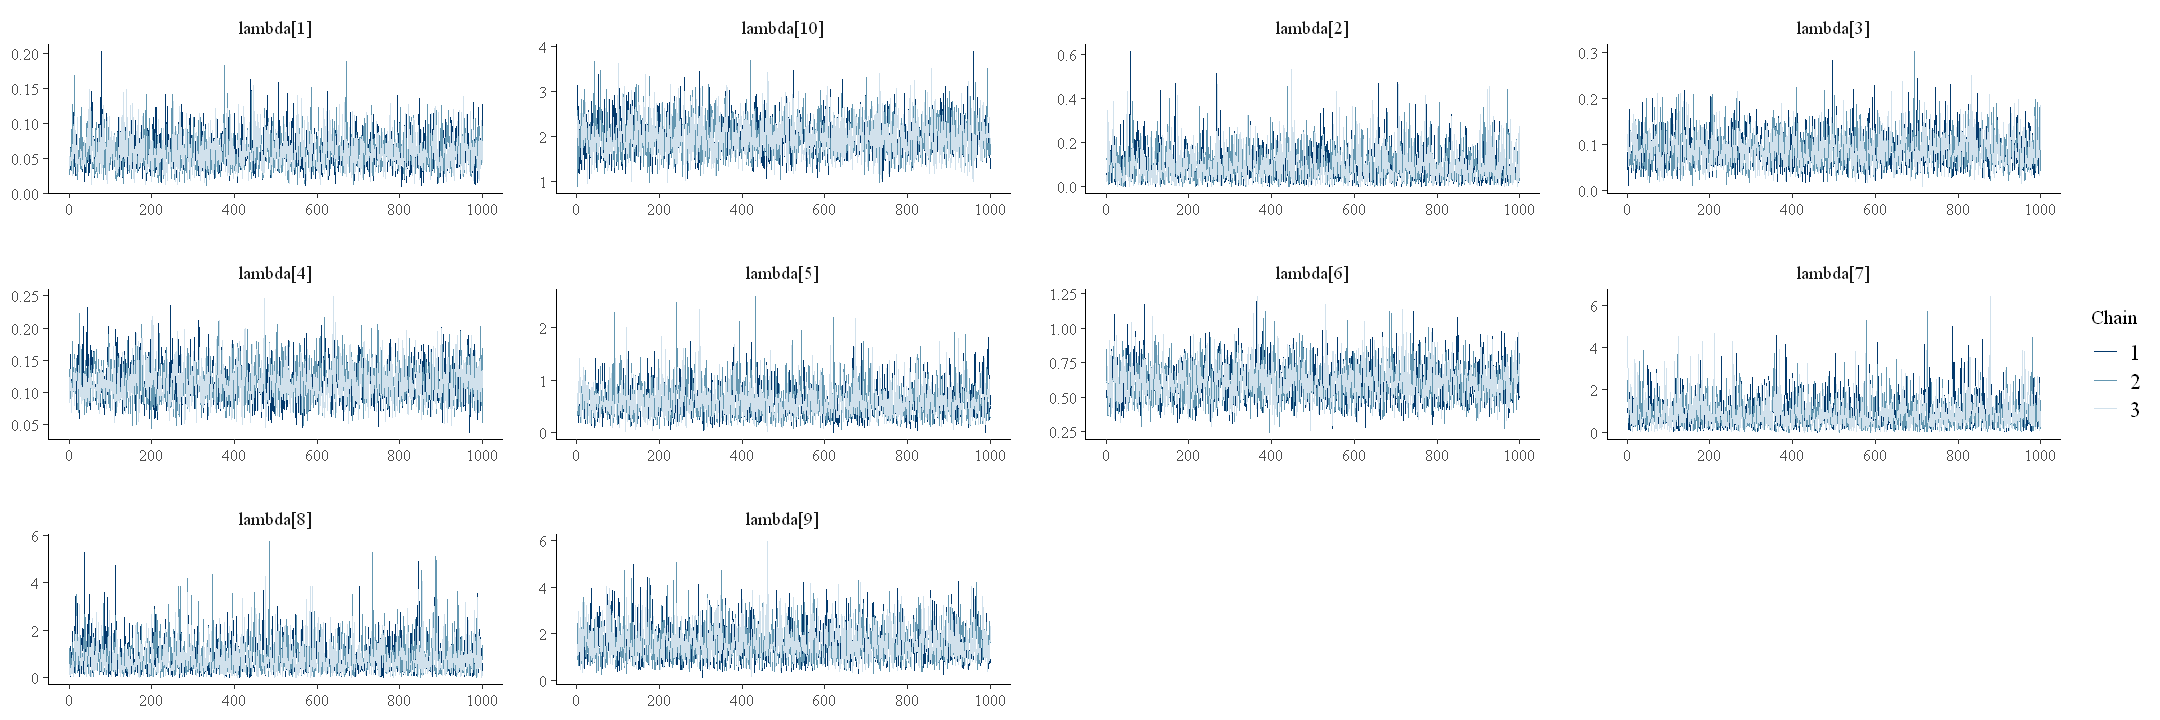

In [20]:
options(repr.plot.width=18,repr.plot.height=6)
mcmc_trace(pumps.JAGS.01.mcmc,pars=vars(contains("lambda")))

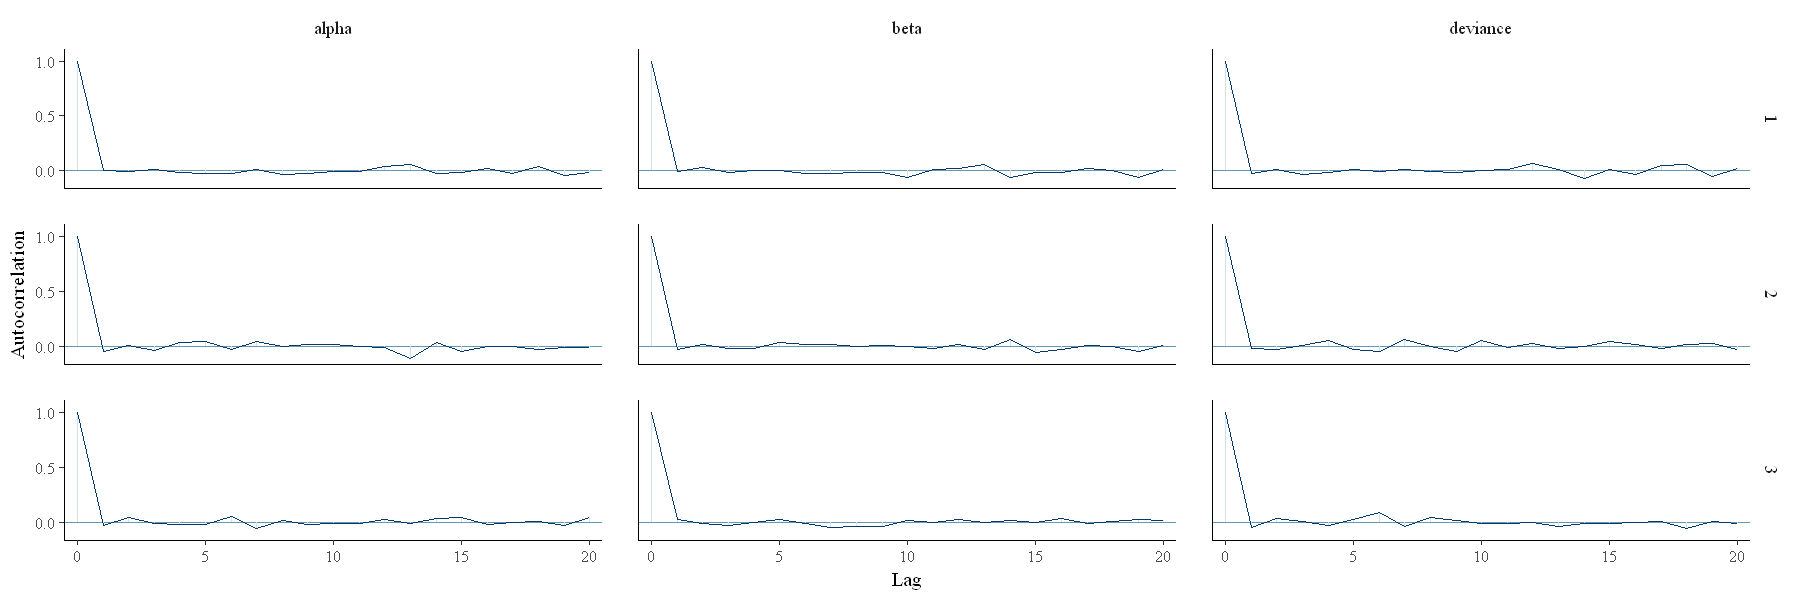

In [21]:
options(repr.plot.width=15,repr.plot.height=5)
mcmc_acf(pumps.JAGS.01.mcmc,pars=c("alpha","beta","deviance"))

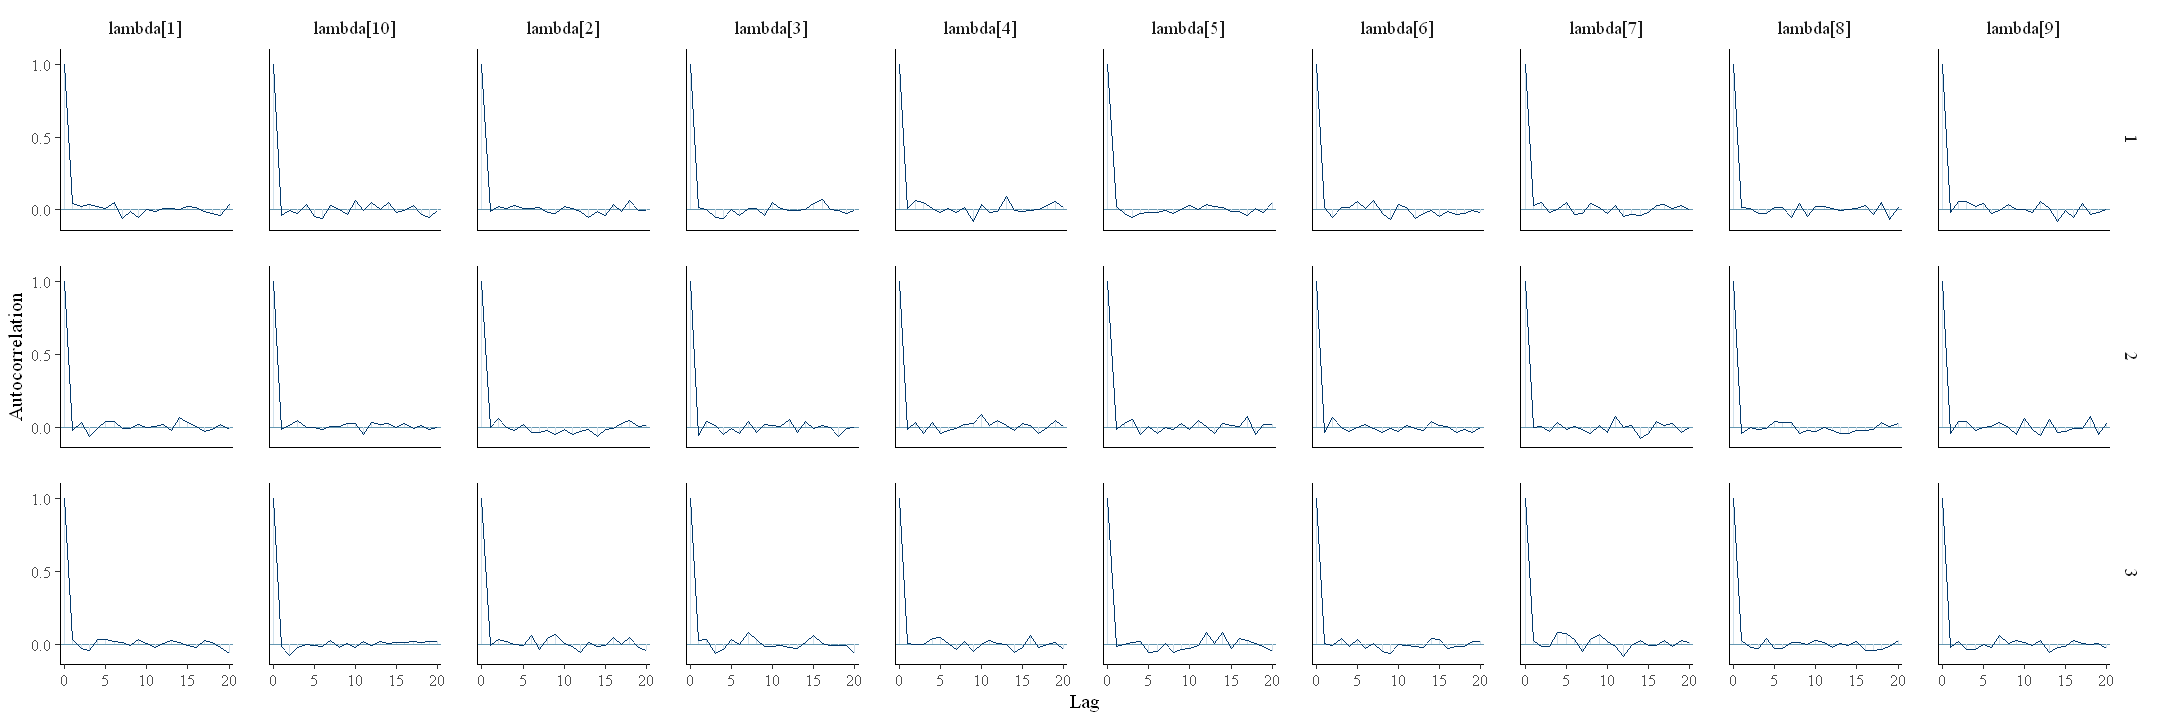

In [22]:
options(repr.plot.width=18,repr.plot.height=6)
mcmc_acf(pumps.JAGS.01.mcmc,pars=vars(contains("lambda")))

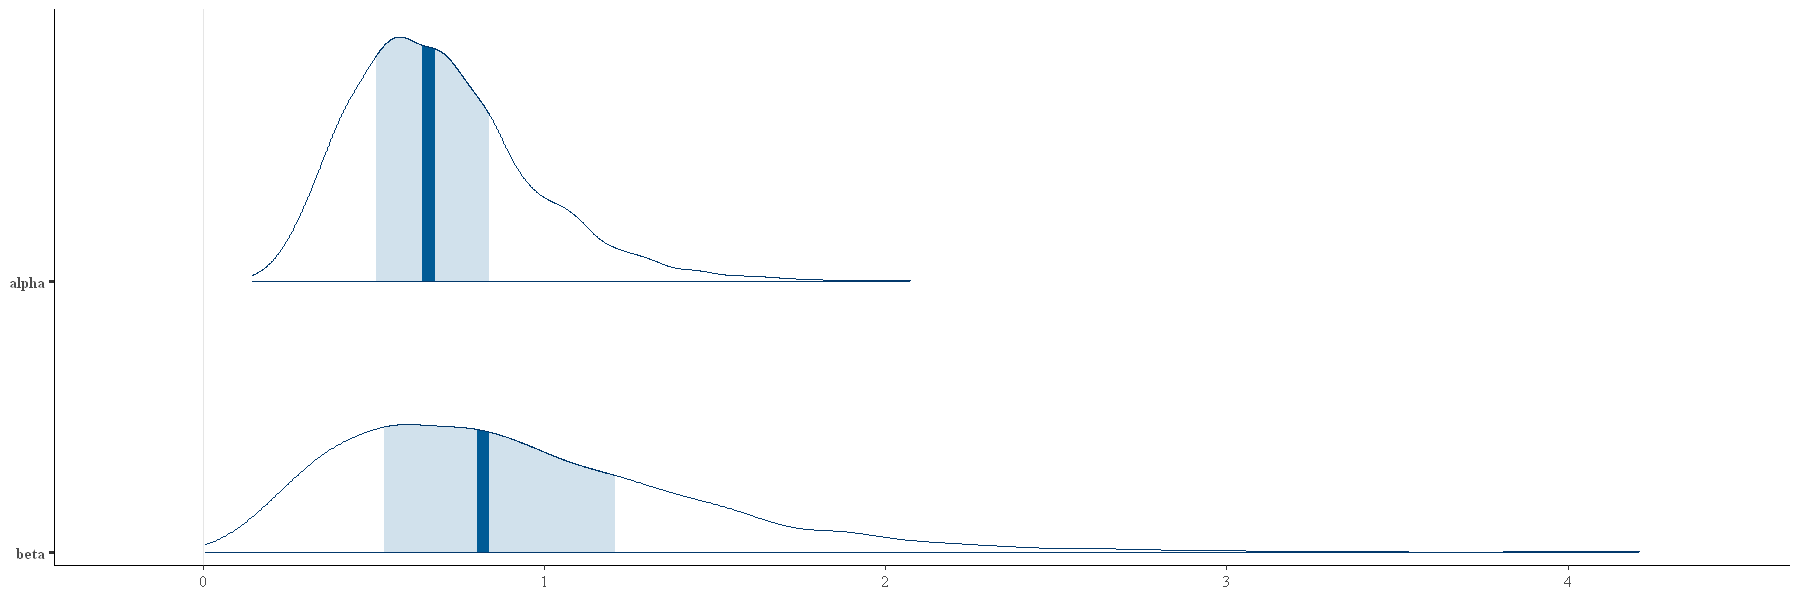

In [23]:
options(repr.plot.width=15,repr.plot.height=5)
mcmc_areas(pumps.JAGS.01.mcmc,pars=c("alpha","beta"))

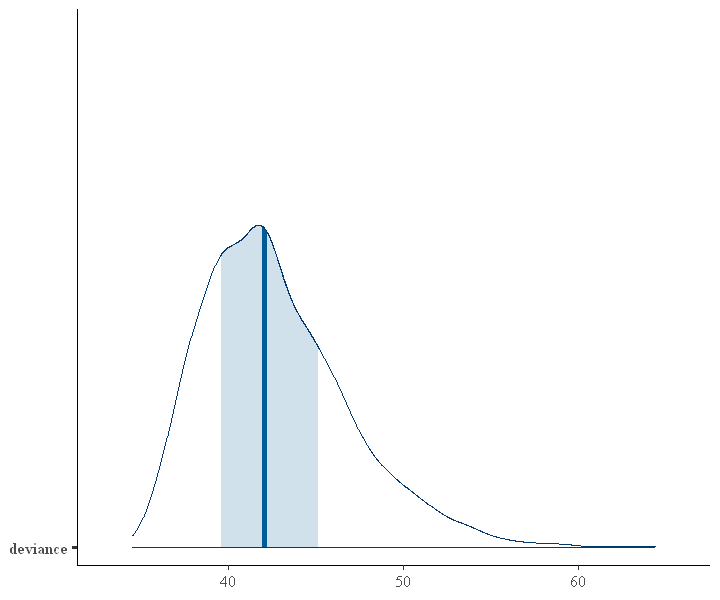

In [24]:
options(repr.plot.width=6,repr.plot.height=5)
mcmc_areas(pumps.JAGS.01.mcmc,pars=c("deviance"))

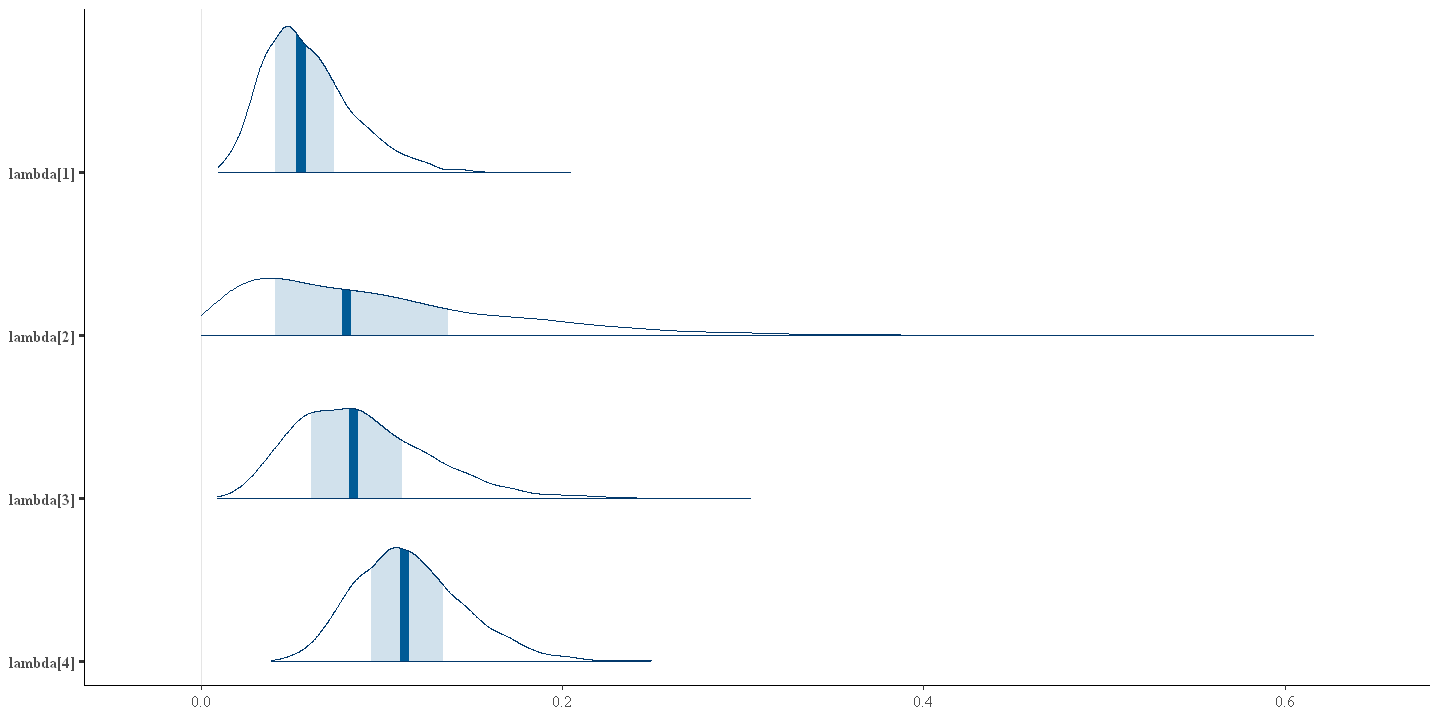

In [25]:
options(repr.plot.width=12,repr.plot.height=6)
mcmc_areas(pumps.JAGS.01.mcmc,pars=vars(param_range("lambda",c(1,2,3,4))))

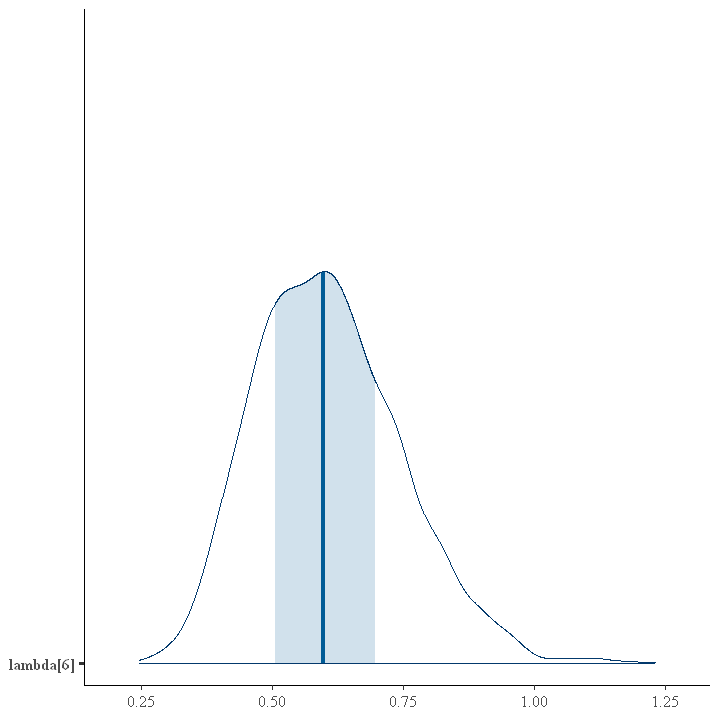

In [26]:
options(repr.plot.width=6,repr.plot.height=6)
mcmc_areas(pumps.JAGS.01.mcmc,pars=vars(param_range("lambda",c(6))))

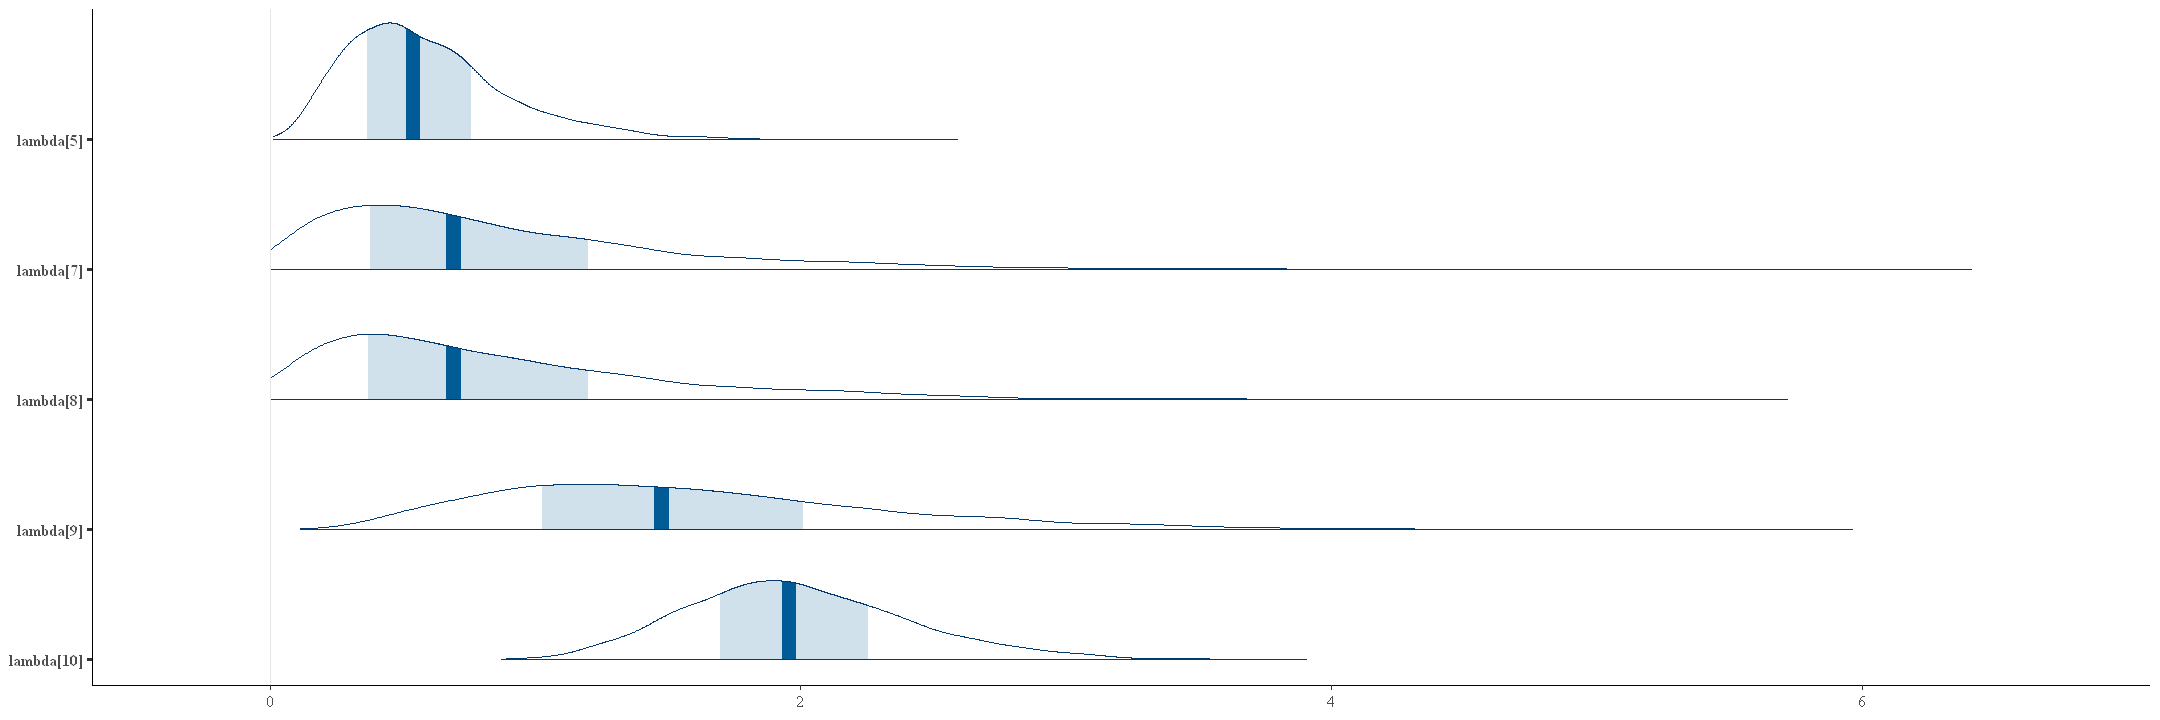

In [27]:
options(repr.plot.width=18,repr.plot.height=6)
mcmc_areas(pumps.JAGS.01.mcmc,pars=vars(param_range("lambda",c(5,7,8,9,10))))

In [28]:
pumps.JAGS.01.m<-as.matrix(pumps.JAGS.01.mcmc)
str(pumps.JAGS.01.m)

 num [1:3000, 1:13] 0.961 0.766 0.706 0.824 0.707 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:13] "alpha" "beta" "deviance" "lambda[1]" ...


In [29]:
MAP<-function(t){
    A<-density(t)
    return(A$x[which.max(A$y)])
}

In [30]:
pumps.JAGS.01.MAP<-apply(pumps.JAGS.01.m,2,MAP)
str(pumps.JAGS.01.MAP)

 Named num [1:13] 0.5772 0.597 41.7472 0.0477 1.9003 ...
 - attr(*, "names")= chr [1:13] "alpha" "beta" "deviance" "lambda[1]" ...


In [31]:
pumps.JAGS.01.mean<-apply(pumps.JAGS.01.m,2,mean)
str(pumps.JAGS.01.mean)

 Named num [1:13] 0.6946 0.9187 42.7401 0.0595 1.9931 ...
 - attr(*, "names")= chr [1:13] "alpha" "beta" "deviance" "lambda[1]" ...


In [32]:
names(pumps.JAGS.01.MAP)

[1] "alpha"      "beta"       "deviance"   "lambda[1]"  "lambda[10]"
 [6] "lambda[2]"  "lambda[3]"  "lambda[4]"  "lambda[5]"  "lambda[6]" 
[11] "lambda[7]"  "lambda[8]"  "lambda[9]"

In [33]:
# Extract lambda[1:10] in its proper order
pumps.JAGS.01.MAP.lambdas<-pumps.JAGS.01.MAP[c(4,6:13,5)]
pumps.JAGS.01.mean.lambdas<-pumps.JAGS.01.mean[c(4,6:13,5)]

In [34]:
rbind("Empirical MAP"=Empirical.lambda.post.MAP,"Full Bayes MAP"=pumps.JAGS.01.MAP.lambdas)    

lambda[1]  lambda[2]  lambda[3]  lambda[4] lambda[5] lambda[6]
Empirical MAP  0.05295461 0.06240447 0.07883604 0.1106171 0.4592528 0.5798930
Full Bayes MAP 0.04771871 0.03855268 0.08182028 0.1079875 0.4548085 0.5995741
               lambda[7] lambda[8] lambda[9] lambda[10]
Empirical MAP  0.4292761 0.4292761 1.148898  1.850429  
Full Bayes MAP 0.4177546 0.3821193 1.198421  1.900328

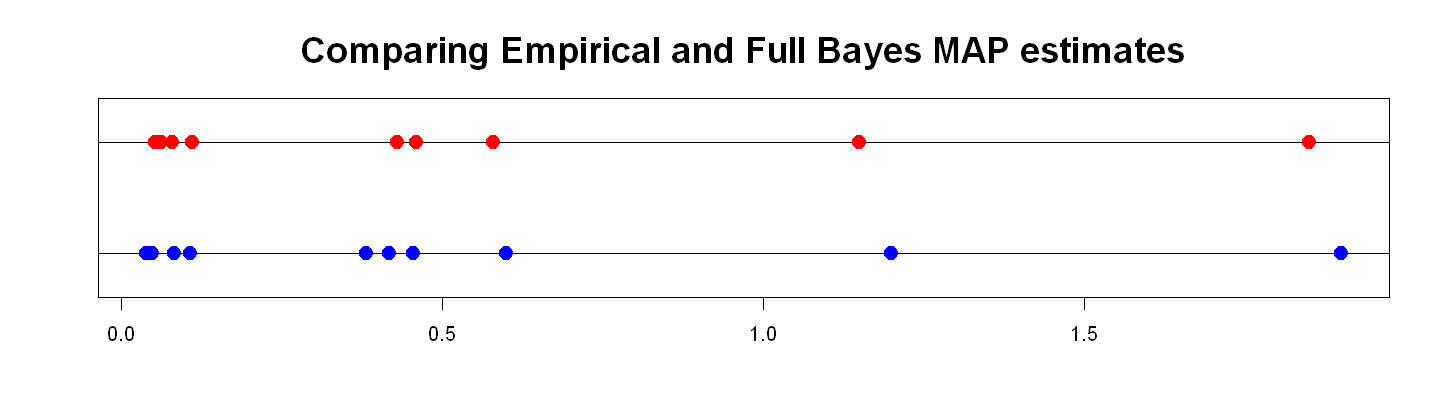

In [35]:
E<-Empirical.lambda.post.MAP
F<-pumps.JAGS.01.MAP.lambdas
x.min<-min(c(E,F))
x.max<-max(c(E,F))
u<-sort(c(E,F))
z<-rep(0,length(u))
h0<-0.3
h1<--h0
z0<-rep(h0,length(E))
z1<-rep(h1,length(F))
options(repr.plot.width=12,repr.plot.height=3.5)
plot(u,z,"p",pch=19,col="white",ylim=c(-0.5,0.5),cex=0.2,ylab="",xlab="",yaxt="n",
    main="Comparing Empirical and Full Bayes MAP estimates",cex.main=1.8 )
abline(h=h0,lwd=0.5,col="black")
abline(h=h1,lwd=0.5,col="black")
points(E,z0,pch=19,col="red",cex=1.6)
points(F,z1,pch=19,col="blue",cex=1.6)

In [36]:
rbind("Empirical mean"=Empirical.lambda.post.mean,"Full Bayes mean"=pumps.JAGS.01.mean.lambdas)

lambda[1]  lambda[2]  lambda[3]  lambda[4] lambda[5] lambda[6]
Empirical mean  0.06339655 0.12065343 0.09438145 0.1184782 0.6087812 0.6102995
Full Bayes mean 0.05946906 0.09887991 0.08908590 0.1156194 0.5965919 0.6075961
                lambda[7] lambda[8] lambda[9] lambda[10]
Empirical mean  0.8299667 0.8299667 1.431090  1.934267  
Full Bayes mean 0.8942649 0.8791362 1.592304  1.993067

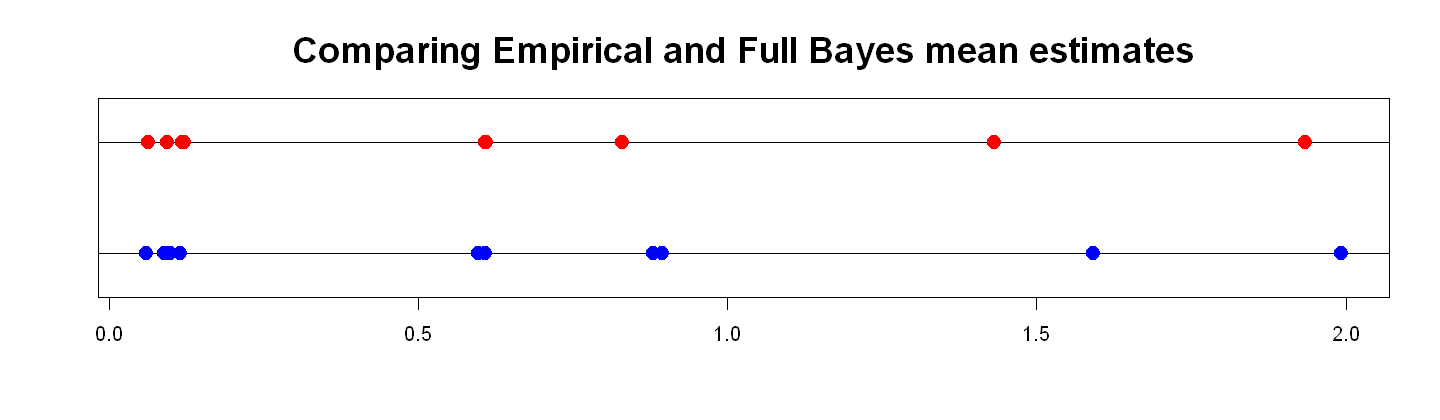

In [37]:
E<-Empirical.lambda.post.mean
F<-pumps.JAGS.01.mean.lambdas
x.min<-min(c(E,F))
x.max<-max(c(E,F))
u<-sort(c(E,F))
z<-rep(0,length(u))
h0<-0.3
h1<--h0
z0<-rep(h0,length(E))
z1<-rep(h1,length(F))
options(repr.plot.width=12,repr.plot.height=3.5)
plot(u,z,"p",pch=19,col="white",ylim=c(-0.5,0.5),cex=0.2,ylab="",xlab="",yaxt="n",
    main="Comparing Empirical and Full Bayes mean estimates",cex.main=1.8 )
abline(h=h0,lwd=0.5,col="black")
abline(h=h1,lwd=0.5,col="black")
points(E,z0,pch=19,col="red",cex=1.6)
points(F,z1,pch=19,col="blue",cex=1.6)

# Using Stan

In [38]:
#install.packages("ggplot2", repos= "https://cloud.r-project.org")
#install.packages("StanHeaders", repos= "https://cloud.r-project.org")
#install.packages("rstan", repos= "https://cloud.r-project.org")
require(rstan,quietly=TRUE)
options(mc.cores = parallel::detectCores())
rstan_options(auto_write = TRUE)
Sys.setenv(LOCAL_CPPFLAGS = '-march=native')


rstan version 2.26.11 (Stan version 2.26.1)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)


Do not specify '-march=native' in 'LOCAL_CPPFLAGS' or a Makevars file


Attaching package: 'rstan'


The following object is masked from 'package:R2jags':

    traceplot


The following object is masked from 'package:coda':

    traceplot




## Data 

In [39]:
x<-c(5, 1, 5, 14, 3, 19, 1, 1, 4, 22)
t<-c(94.320, 15.720, 62.880, 125.760, 5.240, 31.440, 1.048, 1.048, 2.096, 10.480)
n<-length(x)

In [40]:
pumps.dataList<-list(
    x = x,
    t = t,
    n = n 
    )

## Full Bayesian hierarchical treatment

The modeling is based on the assumption that the number of failures of the $i$-th pump follows a Poisson process with parameter $\lambda_{i}$, $(1\leq i\leq 10)$.

For an observation time $t_{i}$, the number of failures $X_{i}$ is thus a $\poissondist(\lambda_{i}\cdot t_{i})$ random variable.

Each $\lambda_{i}$ is considered as a sample from a common $\gammadist(\alpha,\beta)$.

In turn, $\beta$ is given a _hyperprior_ distribution $\gammadist(\gamma,\delta)$.

$\alpha$, $\gamma$ and $\delta$ take constant values to be decided.  

Robert, Casella (2010) use $\alpha=1.8$, $\gamma=0.1$ and $\delta=1.0$ or $\delta=100.0$

Thus we have a hierarchical model:

$$
    \begin{array}{clll}
    X_{i} &\sim&\poissondist(\lambda_{i}\cdot t_{i}),   \mskip50mu     &i=1,\dots,10,\\[0.35cm]
    \lambda_{i} &\sim&\gammadist(\alpha,\beta),              &i=1,\dots,10,\\[0.35cm]
    \beta &\sim&\gammadist(\gamma,\delta).
    \end{array}
$$

In the original paper where this data were first analyzed with a full Bayesian model:

Edward I. George, U. E. Makov and A. F. M. Smith (1993), _"Conjugate Likelihood Distributions"_   
Scandinavian Journal of Statistics, Vol. 20, No. 2 (1993), 147-156,

They use, instead, an exponential prior for $\alpha$:

$$
    \begin{array}{cll}
    \alpha &\sim&\operatorname{Exp}(\omega),
    \end{array}
$$

with parameter either $\omega=1.0$ or $\omega=1/100$. instead of a constant value.

### Specify model

In [42]:
pumps.modelString<-"
data {
  int<lower=0> n;
  int<lower=0> x[n];
  vector[n]  t;
}

parameters {
  real<lower=0> alpha;
  real<lower=0> beta;
  vector<lower=0>[n] lambda;
}

model {
  alpha ~ exponential(1.0);
  beta ~ gamma(0.1, 1.0);
  lambda ~ gamma(alpha, beta);
  x ~ poisson(lambda .* t);
}
" # close quote for modelString

Note the elementwise product in: `x ~ poisson(lambda .* t)`

### Translate model to C++ and compile to _Dynamic Shared Object (DSO)_

In [43]:
pumps.stanDso<-stan_model(model_code=pumps.modelString)

### Generate posterior sample

In [44]:
pumps.stanFit<-sampling(
        object=pumps.stanDso, 
        data = pumps.dataList, 
        chains = 4 ,
        iter = 2000 , 
        warmup = 500 , 
        thin = 1
        )

In [45]:
S<-summary(pumps.stanFit)
round(S$summary,3)

mean   se_mean sd    2.5%   25%    50%    75%    97.5%  n_eff   
alpha       0.701 0.004   0.272  0.286  0.503  0.660  0.852  1.338 4216.560
beta        0.928 0.008   0.538  0.194  0.538  0.824  1.204  2.224 4336.210
lambda[1]   0.060 0.000   0.025  0.020  0.041  0.056  0.075  0.118 7475.610
lambda[2]   0.104 0.001   0.080  0.009  0.044  0.084  0.143  0.311 7209.159
lambda[3]   0.089 0.000   0.038  0.031  0.062  0.084  0.111  0.175 7880.285
lambda[4]   0.116 0.000   0.030  0.065  0.094  0.113  0.134  0.180 8825.608
lambda[5]   0.599 0.003   0.314  0.153  0.365  0.543  0.772  1.354 9058.933
lambda[6]   0.610 0.001   0.138  0.365  0.514  0.599  0.697  0.904 9200.139
lambda[7]   0.892 0.009   0.715  0.076  0.385  0.717  1.188  2.751 6619.070
lambda[8]   0.890 0.008   0.702  0.078  0.382  0.720  1.202  2.696 7860.746
lambda[9]   1.584 0.009   0.763  0.466  1.044  1.451  1.992  3.430 6506.681
lambda[10]  1.986 0.005   0.425  1.252  1.690  1.947  2.249  2.919 6890.096
lp__       85.886 0.052   2.560 79.861 84.421 86.260 87.727 89.883 2469.973
           Rhat 
alpha      1.000
beta       1.001
lambda[1]  1.001
lambda[2]  1.000
lambda[3]  1.000
lambda[4]  1.000
lambda[5]  1.000
lambda[6]  1.000
lambda[7]  1.000
lambda[8]  1.000
lambda[9]  1.000
lambda[10] 1.000
lp__       1.002

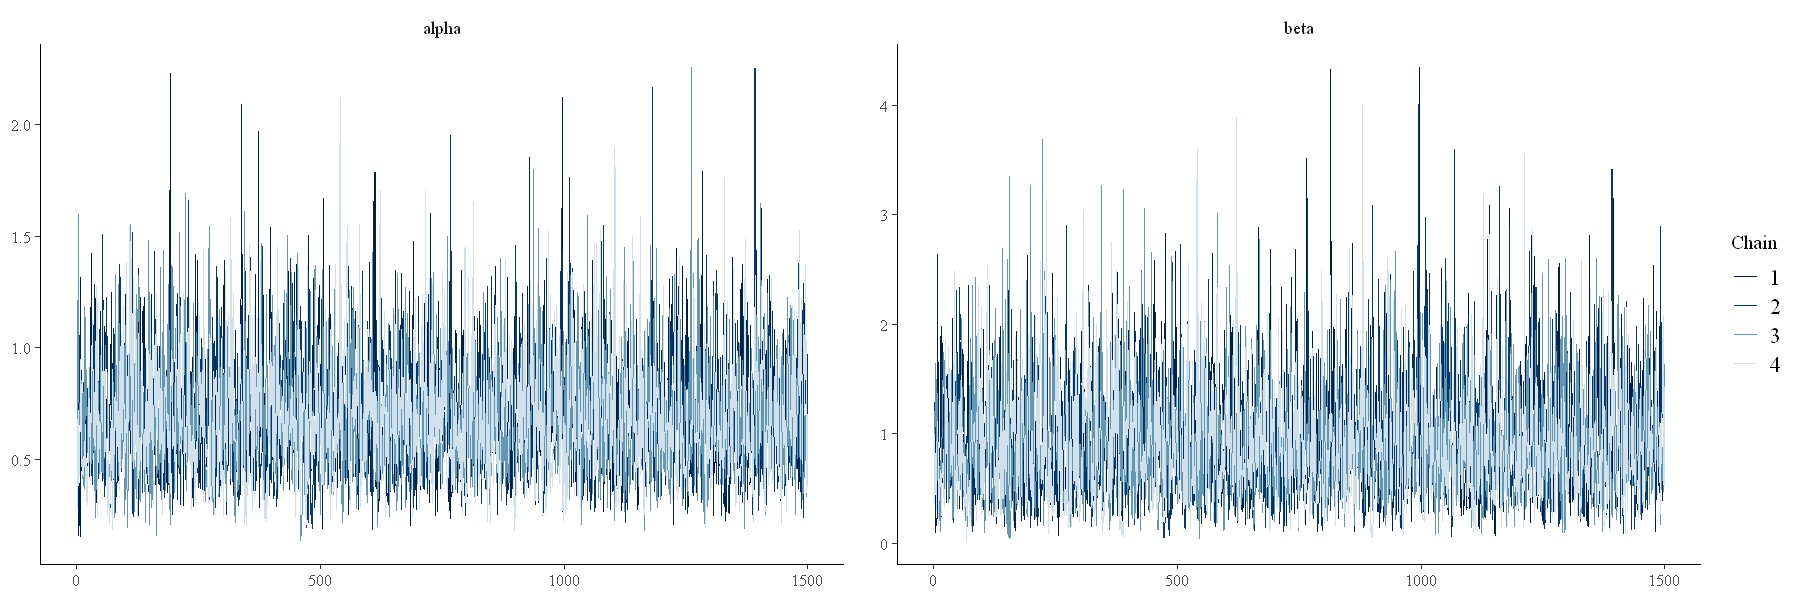

In [46]:
options(repr.plot.width=15,repr.plot.height=5)
mcmc_trace(pumps.stanFit,pars=c("alpha","beta"))

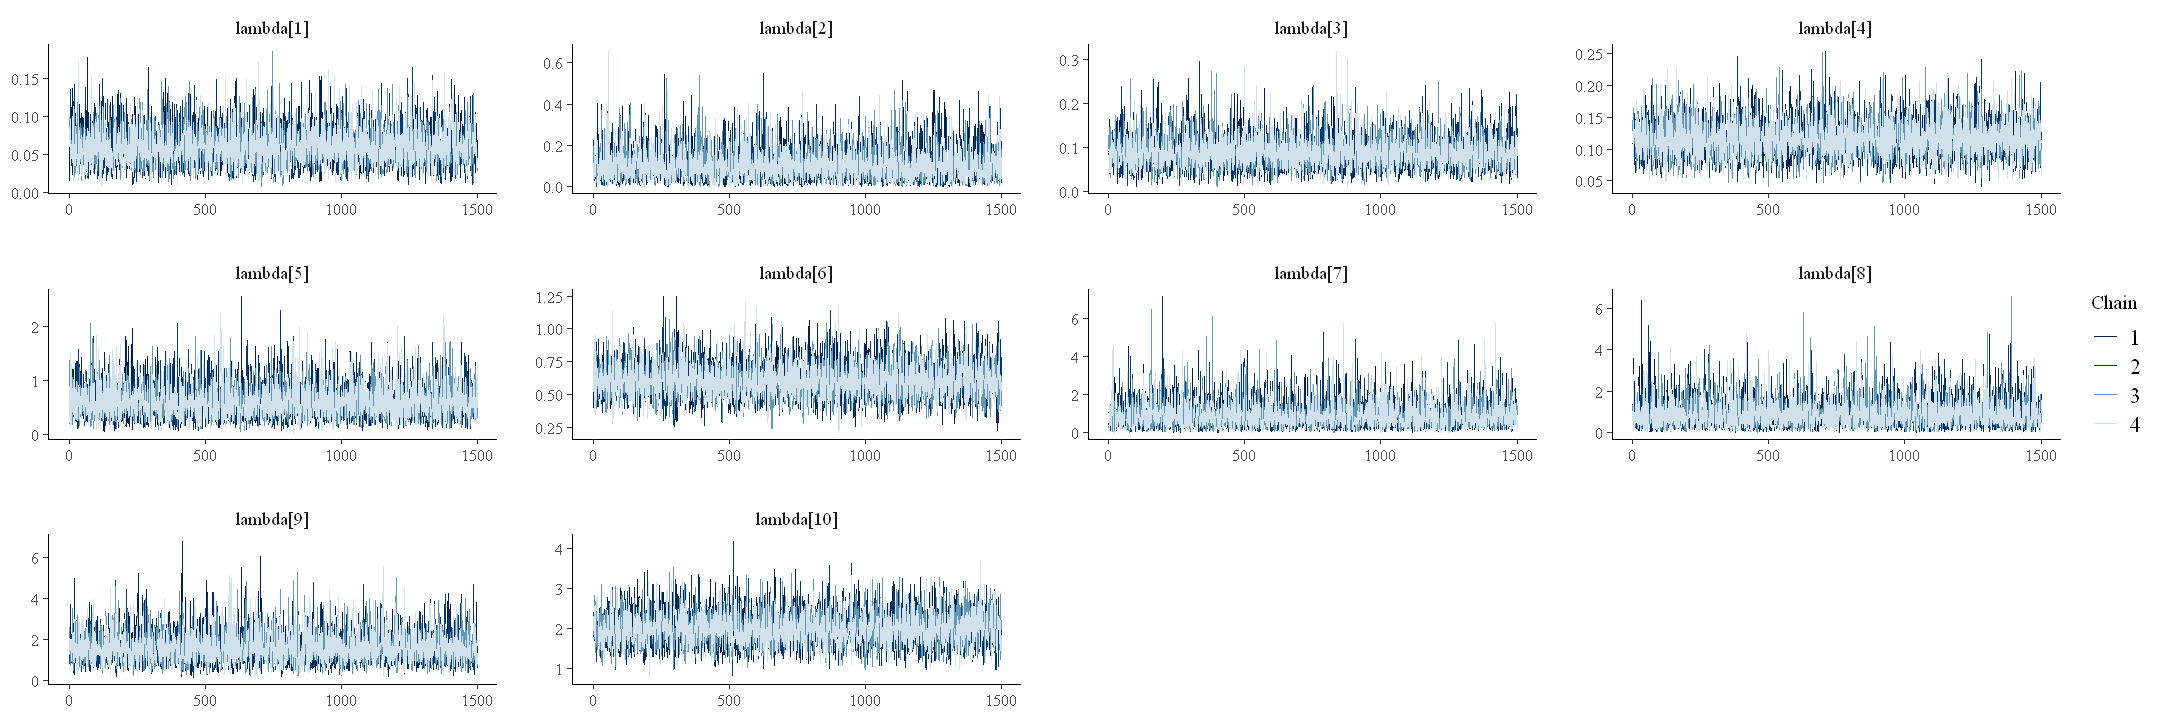

In [47]:
options(repr.plot.width=18,repr.plot.height=6)
mcmc_trace(pumps.stanFit,pars=vars(contains("lambda")))

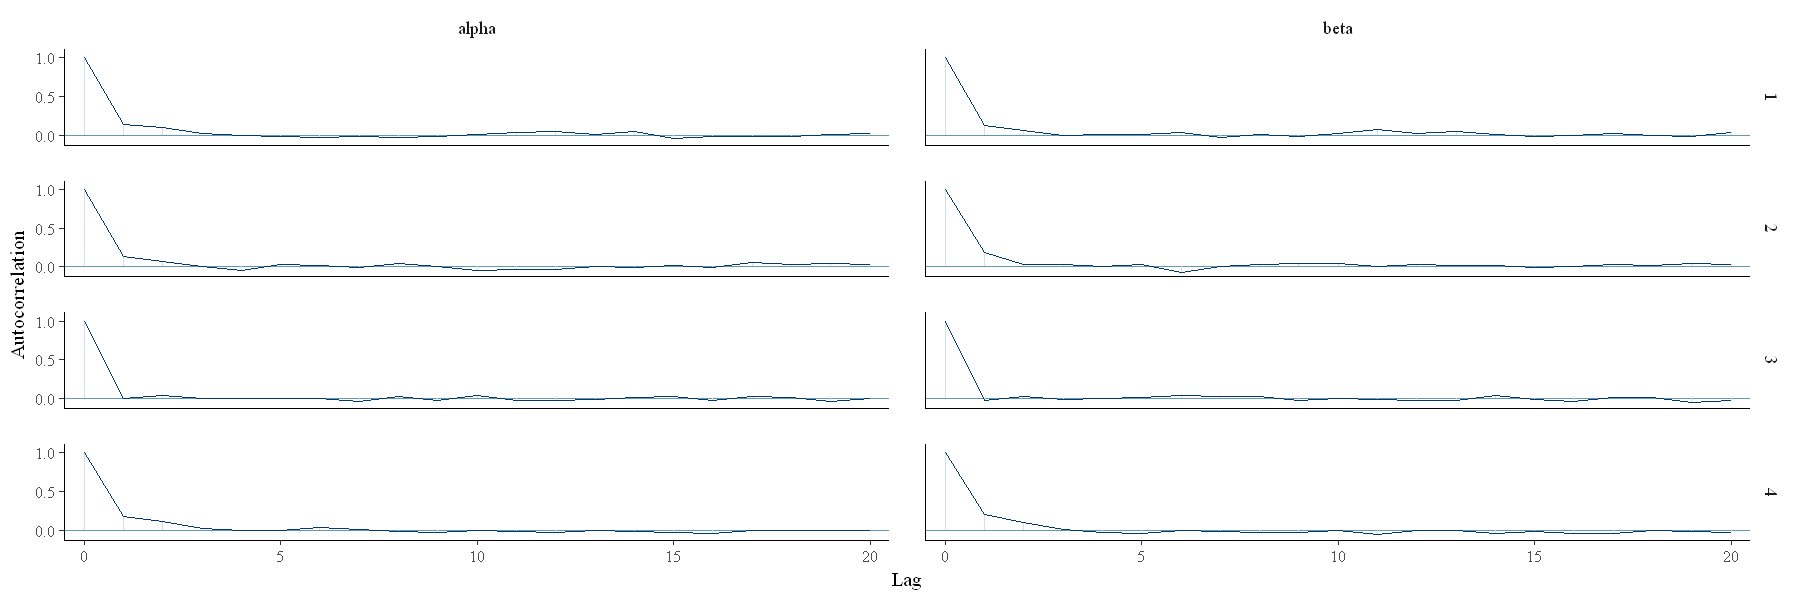

In [48]:
options(repr.plot.width=15,repr.plot.height=5)
mcmc_acf(pumps.stanFit,pars=c("alpha","beta"))

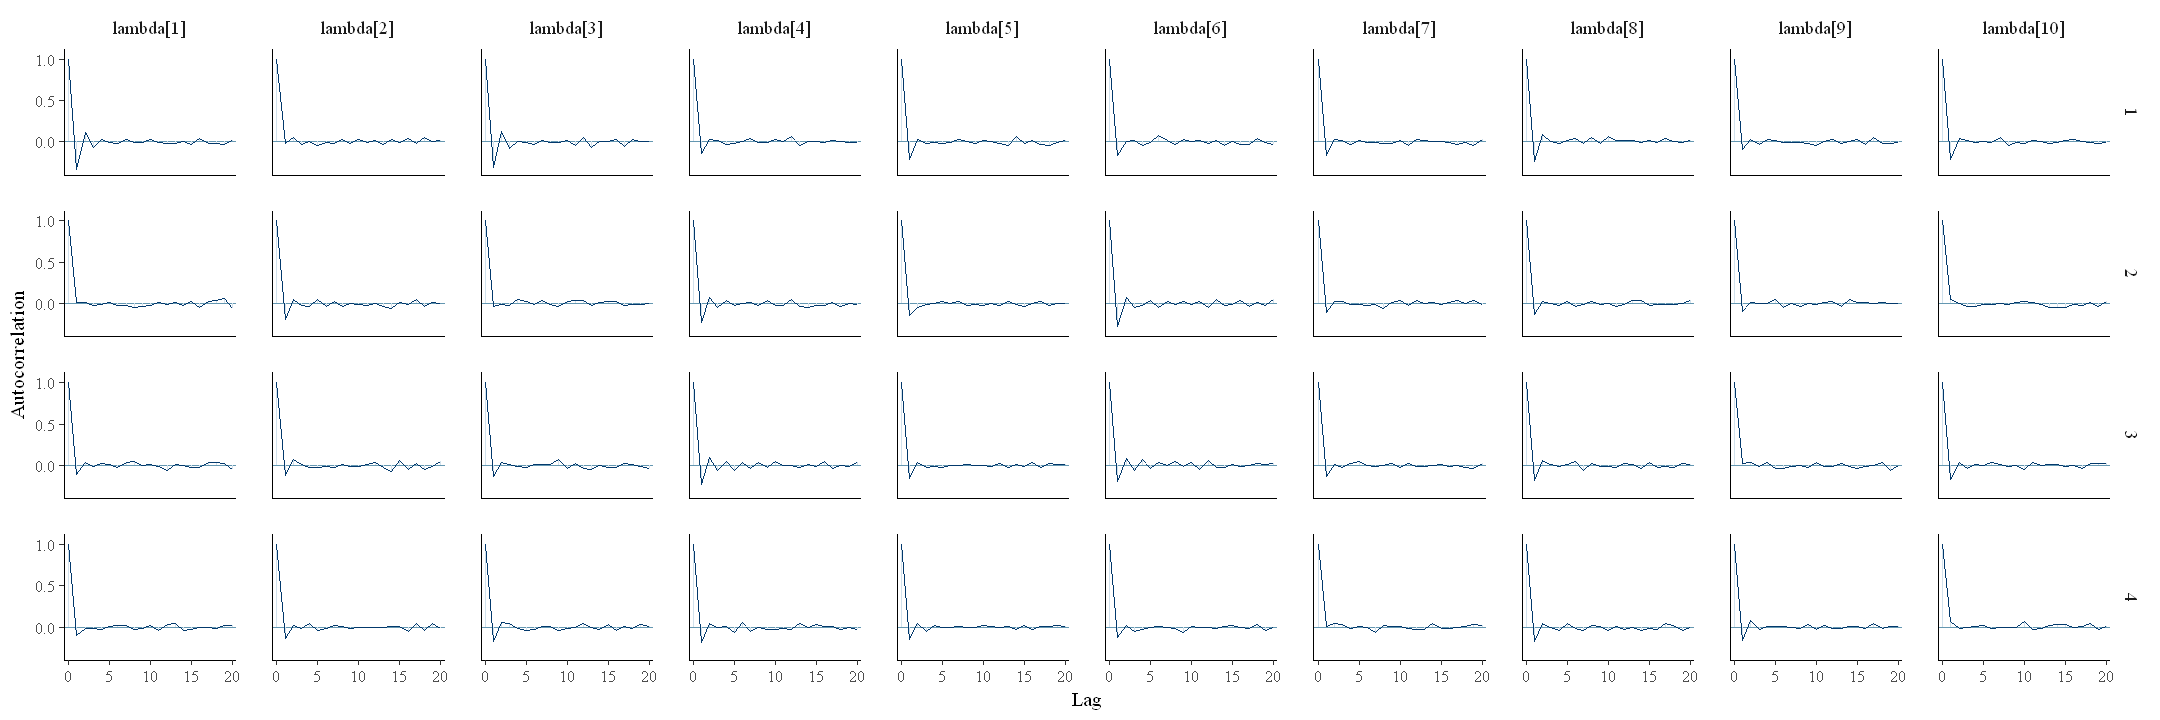

In [49]:
options(repr.plot.width=18,repr.plot.height=6)
mcmc_acf(pumps.stanFit,pars=vars(contains("lambda")))

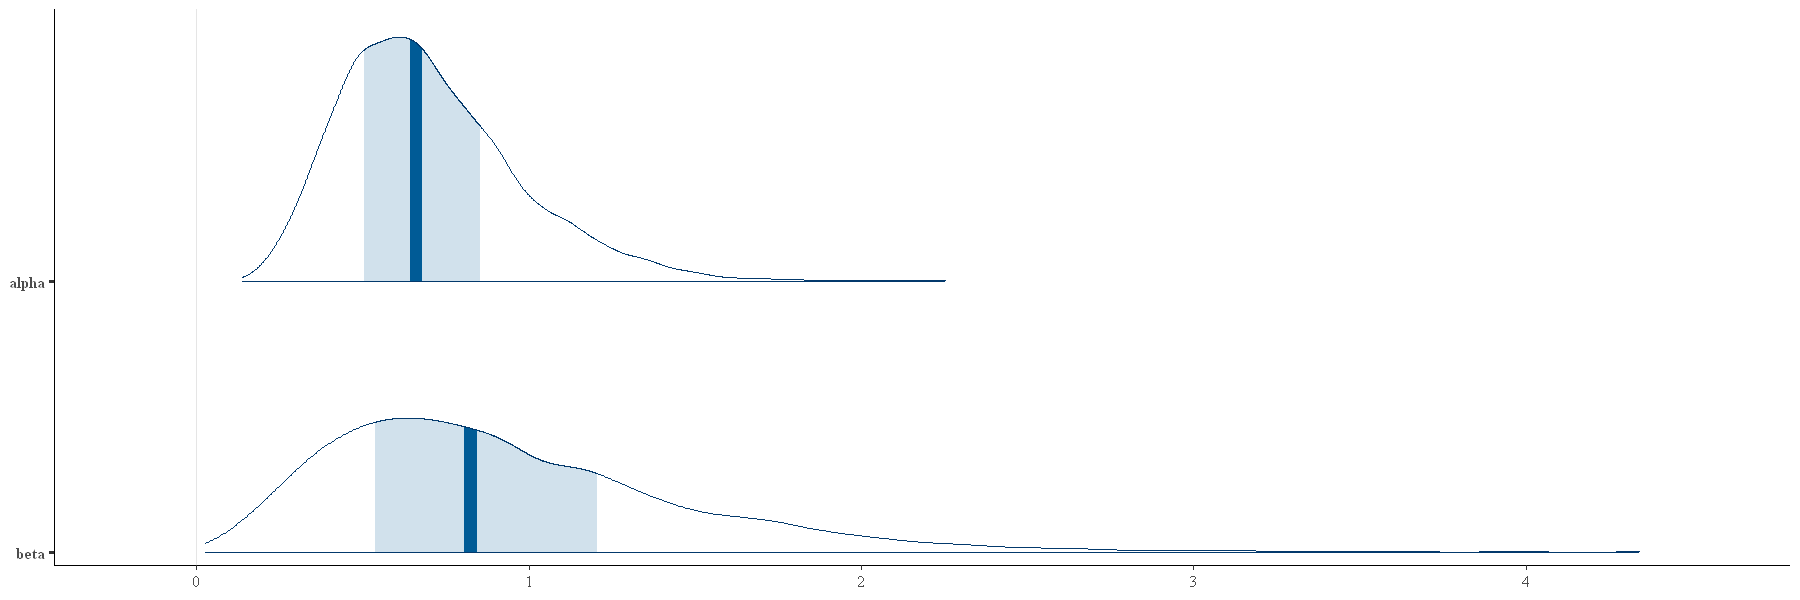

In [50]:
options(repr.plot.width=15,repr.plot.height=5)
mcmc_areas(pumps.stanFit,pars=c("alpha","beta"))

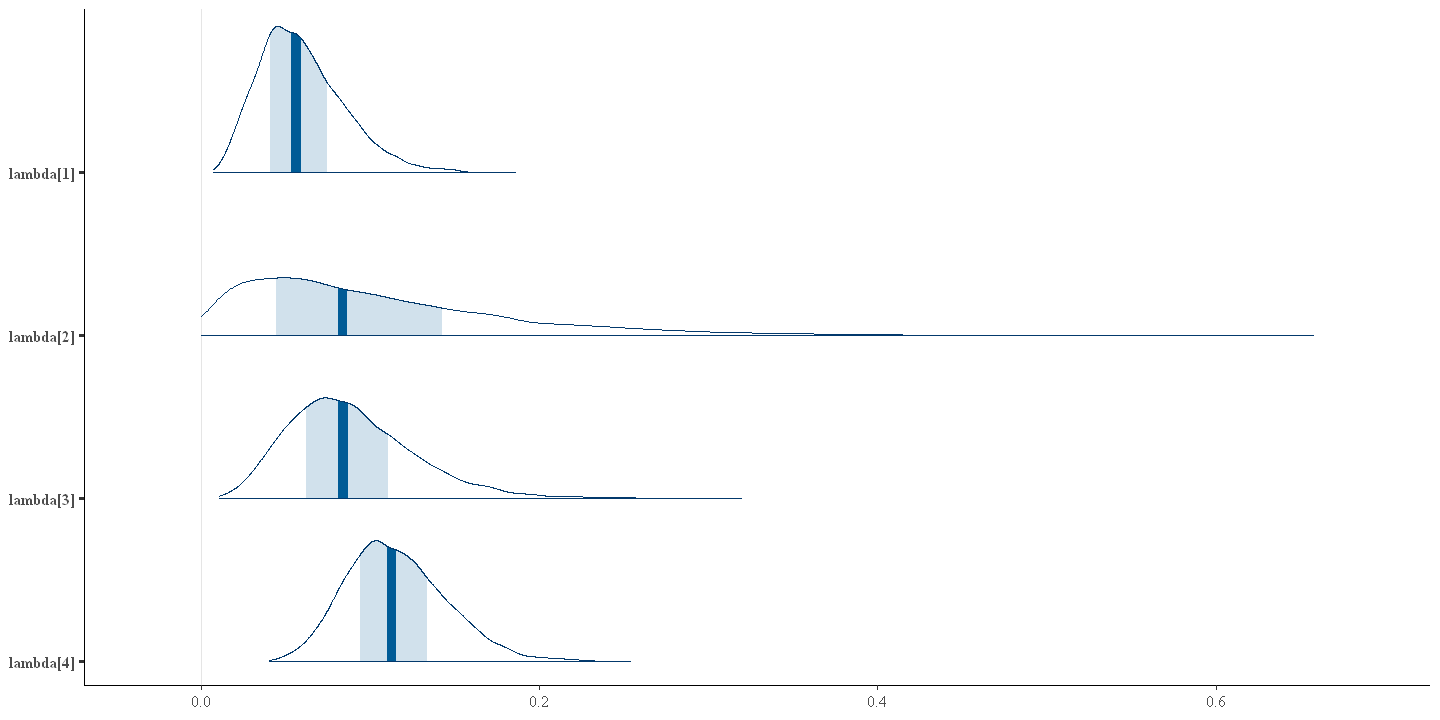

In [51]:
options(repr.plot.width=12,repr.plot.height=6)
mcmc_areas(pumps.stanFit,pars=vars(param_range("lambda",c(1,2,3,4))))

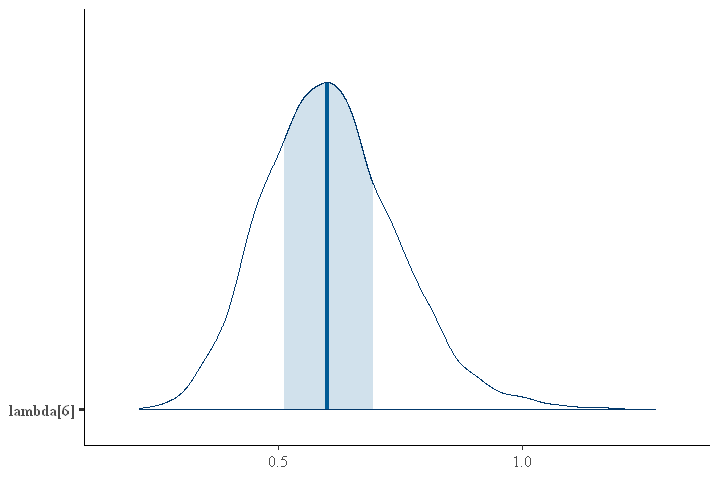

In [50]:
options(repr.plot.width=6,repr.plot.height=4)
mcmc_areas(pumps.stanFit,pars=vars(param_range("lambda",c(6))))

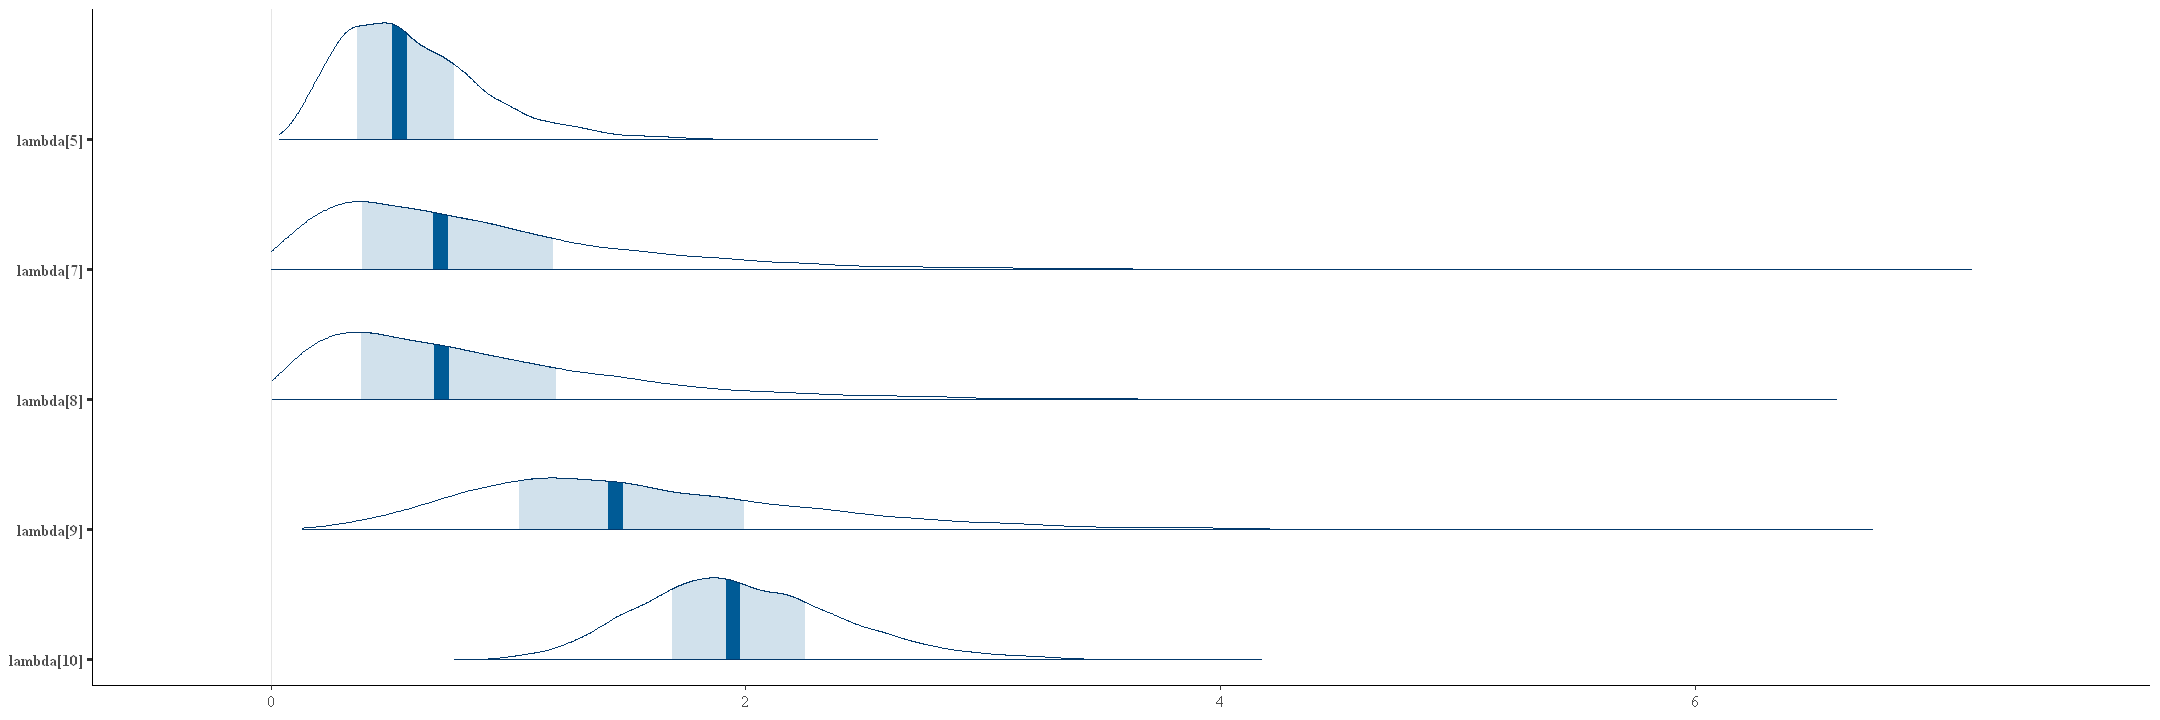

In [52]:
options(repr.plot.width=18,repr.plot.height=6)
mcmc_areas(pumps.stanFit,pars=vars(param_range("lambda",c(5,7,8,9,10))))